# Week 1

## Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:
 $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>

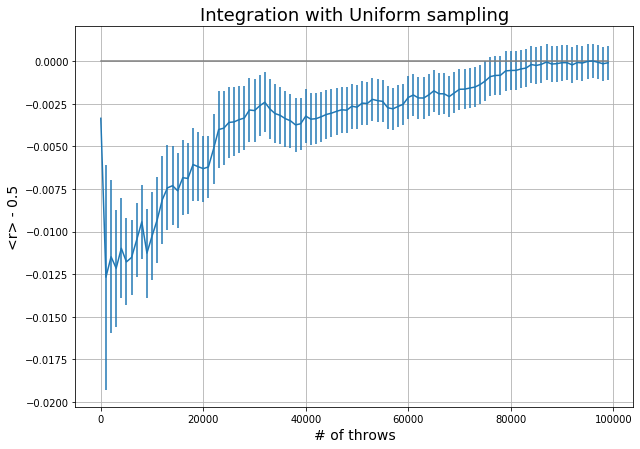

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ave = np.loadtxt("es1_101/averages.out")

ave = np.asarray([elem[0] for elem in Ave])
err = np.asarray([elem[1] for elem in Ave])

M=100000
N=100
L=int(M/N)

x= L* np.arange(N)

fig = plt.figure(figsize = (10,7))

plt.title("Integration with Uniform sampling", fontsize = 18)
plt.errorbar(x,ave-0.5,yerr=err)
plt.plot(x,np.zeros(len(x)),color = 'grey')
plt.xlabel("# of throws",fontsize = 14)
plt.ylabel("<r> - 0.5",fontsize = 14)
plt.grid(True)
plt.show()


As expected, the mean converges to 0.5 within the statistical error

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

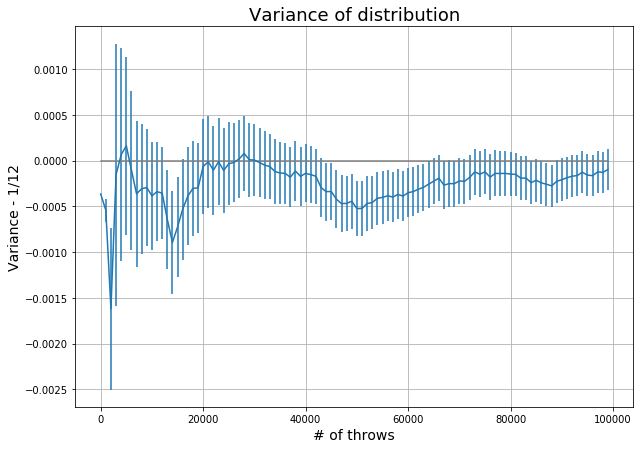

In [2]:
Var = np.loadtxt("es1_101/variance.out")

var = np.asarray([elem[0] for elem in Var])
var_err = np.asarray([elem[1] for elem in Var])

fig = plt.figure(figsize=(10,7))

plt.errorbar(x,var - 1/12,yerr=var_err)
plt.plot(x,np.zeros(len(x)),color = 'grey')
plt.title('Variance of distribution',fontsize = 18)
plt.xlabel("# of throws",fontsize = 14)
plt.ylabel("Variance - 1/12",fontsize = 14)
plt.grid(True)


plt.show()

Again, the variance converges to the expected value $\sigma^2 = \frac{1}{12}$

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

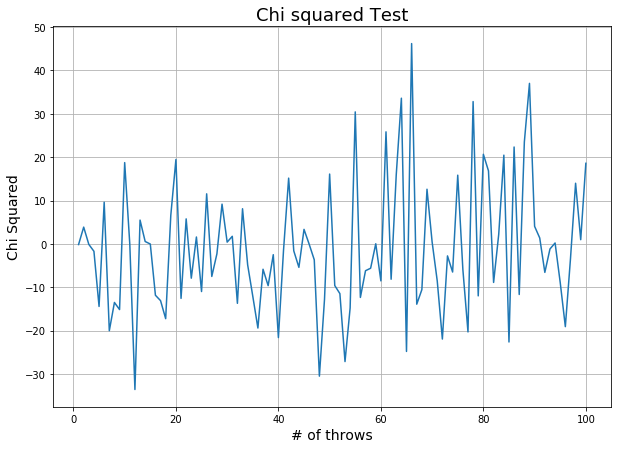

In [3]:
chi = np.loadtxt("es1_103/chi_squared.dat")

n= np.arange(100)

fig = plt.figure(figsize = (10,7))

plt.errorbar(n+1,chi - 100,yerr=np.zeros(100))
plt.title('Chi squared Test',fontsize = 18)
plt.xlabel("# of throws",fontsize = 14)
plt.ylabel("Chi Squared",fontsize = 14)
plt.grid(True)
plt.show()

The $\chi^2$ value oscillates, but is always of order  $\leq \mathcal{O}(10)$, which is in line with the expectation.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:
1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [9]:
#read data in two arrays

x=[]
y=[]
with open('es1_2/results.dat', 'r') as file:
    for number in file.readline().split(' '):
        if number != '\n' and number!=' ':
            x.append((number))
    for number in file.readline().split(' '):
        if number != '\n' and number!=' ':
            y.append((number))        
            
#print(x)
#for i in range(len(y)):
#       print(float(y[i]))

x=[float(elem) for elem in x]
y=[float(elem) for elem in y]

x=np.array(x)
y=np.array(y)

In [10]:
exp_data=[]
Cau_data=[]
with open('es1_2/results.dat', 'r') as file:
    for k in range(4):
        appo=[]
        for number in file.readline().split(' '):
            if number != '\n' and number!=' ':
                appo.append((number))
        appo=[float(elem) for elem in appo]
        appo=np.array(appo)
        exp_data.append(appo)
        
    for k in range(4):
        appo=[]
        for number in file.readline().split(' '):
            if number != '\n' and number!=' ':
                appo.append((number))
        appo=[float(elem) for elem in appo]
        appo=np.array(appo)
        Cau_data.append(appo)

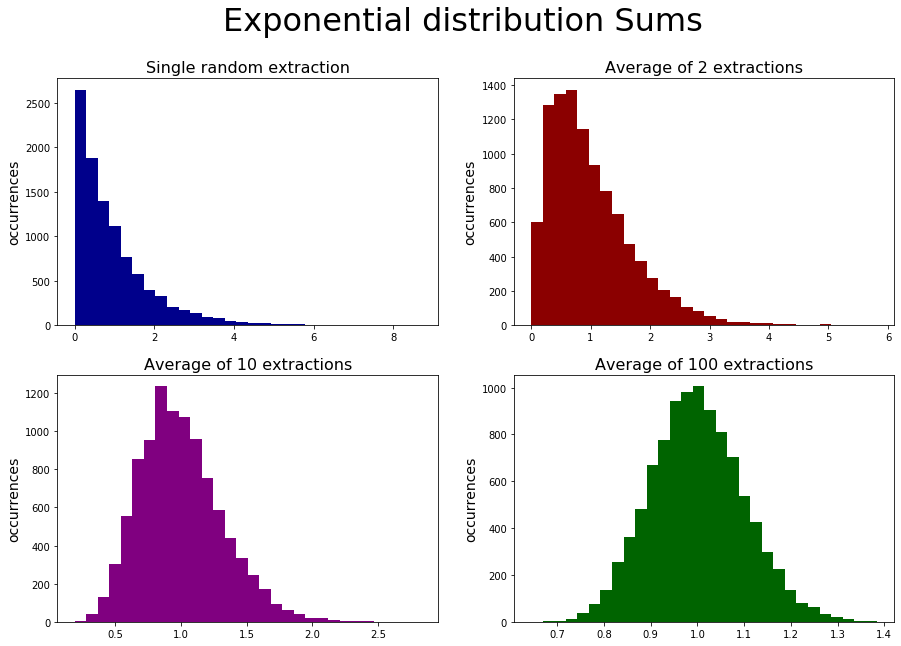

In [11]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Exponential distribution Sums', fontsize=32)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(exp_data[0], bins=30,color = 'darkblue')
ax1.set_title('Single random extraction',fontsize = 16)
ax1.set_ylabel('occurrences',fontsize = 14)

ax2.hist(exp_data[1], bins=30,color = 'darkred')
ax2.set_title('Average of 2 extractions',fontsize = 16)
ax2.set_ylabel('occurrences',fontsize = 14)

ax3.hist(exp_data[2], bins=30,color = 'purple')
ax3.set_title('Average of 10 extractions',fontsize = 16)
ax3.set_ylabel('occurrences',fontsize = 14)

ax4.hist(exp_data[3], bins=30,color = 'darkgreen')
ax4.set_title('Average of 100 extractions',fontsize = 16)
ax4.set_ylabel('occurrences',fontsize = 14)

plt.show()

### It can be seen that the average of numbers extracted out of an exponential distribution tends to a Gaussian distribution, as it should be according to the Central Limit Theorem

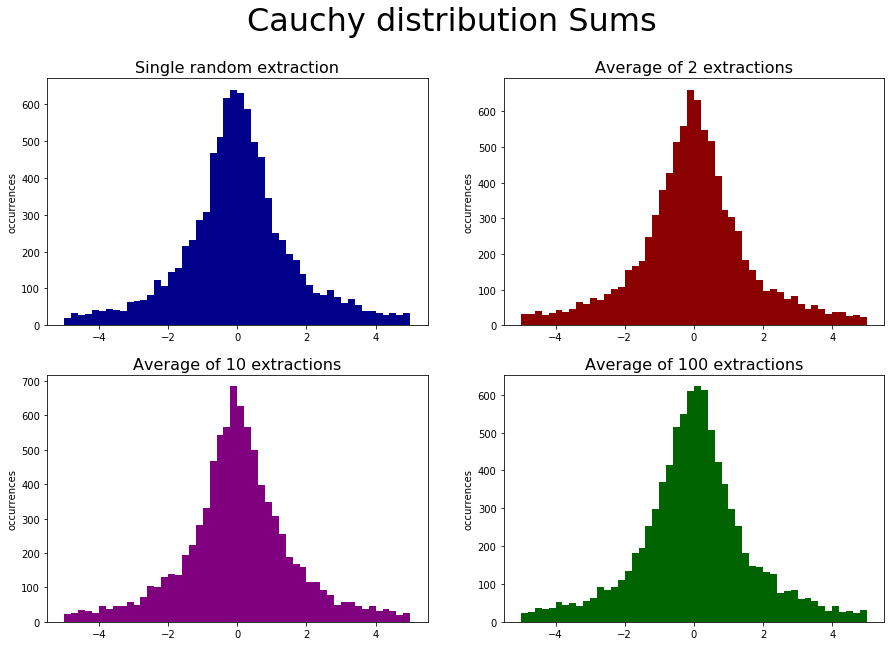

In [12]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Cauchy distribution Sums', fontsize=32)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(Cau_data[0], bins=50, range=(-5,5),color = 'darkblue')
ax1.set_title('Single random extraction',fontsize = 16)
ax1.set_ylabel('occurrences')

ax2.hist(Cau_data[1], bins=50, range=(-5,5),color = 'darkred')
ax2.set_title('Average of 2 extractions',fontsize = 16)
ax2.set_ylabel('occurrences')

ax3.hist(Cau_data[2], bins=50, range=(-5,5),color = 'purple')
ax3.set_title('Average of 10 extractions',fontsize = 16)
ax3.set_ylabel('occurrences')

ax4.hist(Cau_data[3], bins=50, range=(-5,5),color = 'darkgreen')
ax4.set_title('Average of 100 extractions',fontsize = 16)
ax4.set_ylabel('occurrences')

plt.show()

### The Cauchy distribution remains approximately unchanged when averaging, as it is supposed to, because it does not satisfy the hypotheses of the CLT. Furthermore, it is in fact its own attractor.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

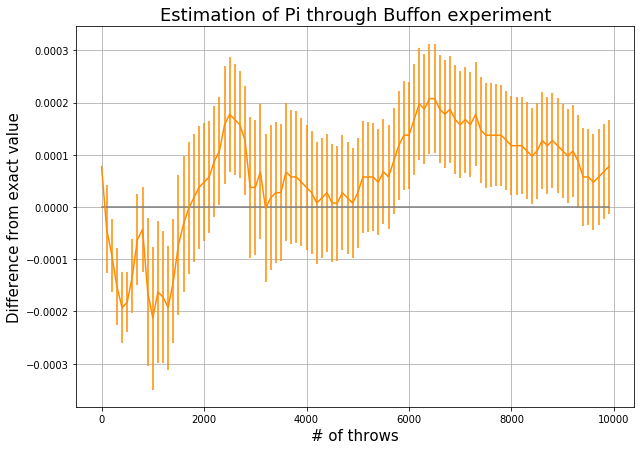

In [8]:
estim = np.loadtxt("es1_3/pi.dat")
err = np.loadtxt("es1_3/errors.dat")

M=10000
N=100
L=int(M/N)

x= L* np.arange(N)

fig = plt.figure(figsize = (10,7))

plt.errorbar(x,estim - np.pi,yerr=err, color = 'darkorange')
plt.plot(x,np.zeros(len(x)),color = 'grey')
plt.title('Estimation of Pi through Buffon experiment',fontsize = 18)
plt.xlabel("# of throws",fontsize = 15)
plt.ylabel("Difference from exact value",fontsize = 15)
plt.grid(True)
plt.show()